# Facial - keypoint detection

1. import dataset
2. Normalize dataset
3. Split dataset into training and validation set
4. train the model using training set
5. evaluate the model using validation set

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import os


In [2]:
train_path = '/kaggle/input/facial-keypoints-detection/training.zip'
test_path = '/kaggle/input/facial-keypoints-detection/test.zip'

Id_table_path = '/kaggle/input/facial-keypoints-detection/IdLookupTable.csv'

sample_sub_path = '/kaggle/input/facial-keypoints-detection/SampleSubmission.csv'

extracted_files_path = '/kaggle/working'

In [3]:
Id_table = pd.read_csv(Id_table_path)

sample_sub = pd.read_csv(sample_sub_path)

In [4]:
import zipfile
with zipfile.ZipFile(train_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_files_path)
#Unzip test csv file to 'extracted_files_path'.
with zipfile.ZipFile(test_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_files_path)

In [5]:
#Read train csv file.
train_csv = pd.read_csv(extracted_files_path + '/training.csv')
#Read test csv file.
test_csv = pd.read_csv(extracted_files_path + '/test.csv')
#Read IdLookUpTable csv file.
looktable_csv = pd.read_csv(Id_table_path)

In [6]:
train_csv.isnull().any().value_counts()

True     28
False     3
dtype: int64

In [7]:
train_csv.fillna(method = 'ffill',inplace = True)

In [8]:
train_csv.isnull().any().value_counts()

False    31
dtype: int64

In [9]:
train_csv['Image'] = train_csv['Image'].apply(lambda x: np.fromstring(x, dtype=int, sep=' '))

In [10]:
Y = train_csv.drop("Image",axis = 1)

X_train = train_csv['Image']

X_train = X_train / 255

X = np.array([X_train], dtype=float)

X=X.reshape(X_train.shape[0],96,96,1)

Y



,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_x,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y
0,66.033564,39.002274,30.227008,36.421678,59.582075,39.647423,73.130346,39.969997,36.356571,37.389402,...,44.420571,57.066803,61.195308,79.970165,28.614496,77.388992,43.312602,72.935459,43.130707,84.485774
1,64.332936,34.970077,29.949277,33.448715,58.856170,35.274349,70.722723,36.187166,36.034723,34.361532,...,48.206298,55.660936,56.421447,76.352000,35.122383,76.047660,46.684596,70.266553,45.467915,85.480170
2,65.057053,34.909642,30.903789,34.909642,59.412000,36.320968,70.984421,36.320968,37.678105,36.320968,...,47.557263,53.538947,60.822947,73.014316,33.726316,72.732000,47.274947,70.191789,47.274947,78.659368
3,65.225739,37.261774,32.023096,37.261774,60.003339,39.127179,72.314713,38.380967,37.618643,38.754115,...,51.885078,54.166539,65.598887,72.703722,37.245496,74.195478,50.303165,70.091687,51.561183,78.268383
4,66.725301,39.621261,32.244810,38.042032,58.565890,39.621261,72.515926,39.884466,36.982380,39.094852,...,43.299534,64.889521,60.671411,77.523239,31.191755,76.997301,44.962748,73.707387,44.227141,86.871166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7044,67.402546,31.842551,29.746749,38.632942,59.255347,36.065143,73.942694,34.624653,37.478531,39.398041,...,48.265961,67.029093,72.600433,71.862041,34.232759,77.339429,51.599453,75.963592,50.426637,79.683921
7045,66.134400,38.365501,30.478626,39.950198,59.255347,36.065143,73.942694,34.624653,37.478531,39.398041,...,47.910346,66.626011,72.600433,71.862041,34.232759,77.339429,51.599453,75.963592,50.287397,77.983023
7046,66.690732,36.845221,31.666420,39.685042,59.255347,36.065143,73.942694,34.624653,37.478531,39.398041,...,49.462572,67.515161,72.600433,71.862041,34.232759,77.339429,51.599453,75.963592,49.462572,78.117120
7047,70.965082,39.853666,30.543285,40.772339,59.255347,36.065143,73.942694,34.624653,37.478531,39.398041,...,50.754202,66.724988,72.600433,71.862041,34.232759,77.339429,51.599453,75.963592,50.065186,79.586447


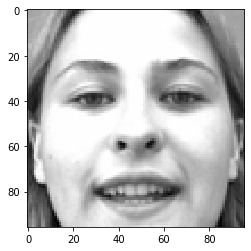

In [11]:
plt.imshow(X[7].reshape(96,96),cmap='gray')
plt.show()

In [12]:
from keras.models import Sequential

from keras.layers import Conv2D

from keras.layers import MaxPooling2D

from keras.layers import Dense,BatchNormalization,Flatten,Dropout

from keras.optimizers import Adam

import keras

from keras.layers.advanced_activations import LeakyReLU

Using TensorFlow backend.


In [13]:
model = Sequential()

In [14]:
keras.initializers.TruncatedNormal(mean=0,stddev = .05 )

model.add(Conv2D(filters =64,kernel_size = (3,3),input_shape = (96,96,1),strides =(1,1),padding ="same",bias_initializer ='zero'))

model.add(LeakyReLU(alpha=0.2))

model.add(BatchNormalization())

model.add(Conv2D(filters =64,kernel_size = (3,3),strides =(1,1),padding ="same",bias_initializer ='zero'))

model.add(LeakyReLU(alpha=0.2))

model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size =(2,2),strides =(2,2),padding ="same"))

# layer 2

model.add(Conv2D(filters =128,kernel_size = (3,3),strides =(1,1),padding ="same",bias_initializer ='zero'))

model.add(LeakyReLU(alpha=0.2))

model.add(BatchNormalization())

model.add(Conv2D(filters =128,kernel_size = (3,3),strides =(1,1),padding ="same",bias_initializer ='zero'))

model.add(LeakyReLU(alpha=0.2))

model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size =(2,2),strides =(2,2),padding ="same"))

# layer 3

model.add(Conv2D(filters =256,kernel_size = (3,3),strides =(1,1),padding ="same",bias_initializer ='zero'))

model.add(LeakyReLU(alpha=0.2))

model.add(BatchNormalization())

model.add(Conv2D(filters =256,kernel_size = (3,3),strides =(1,1),padding ="same",bias_initializer ='zero'))

model.add(LeakyReLU(alpha=0.2))

model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size =(2,2),strides =(2,2),padding ="same"))

# layer 4

model.add(Conv2D(filters =512,kernel_size = (3,3),strides =(1,1),padding ="same",bias_initializer ='zero'))

model.add(LeakyReLU(alpha=0.2))

model.add(BatchNormalization())

model.add(Conv2D(filters =512,kernel_size = (3,3),strides =(1,1),padding ="same",bias_initializer ='zero'))

model.add(LeakyReLU(alpha=0.2))

model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size =(2,2),strides =(2,2),padding ="same"))


# flatten

model.add(Flatten())

# fully connected layer 1

model.add(Dense(2048,activation ="relu"))

model.add(BatchNormalization())

model.add(Dropout(0.2))

# fully connected layer 2

model.add(Dense(512,activation ="relu"))

model.add(BatchNormalization())

model.add(Dropout(0.2))

model.add(Dense(30))

model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 96, 96, 64)        640       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 96, 96, 64)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 96, 96, 64)        256       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 96, 96, 64)        36928     
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 96, 96, 64)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 96, 96, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 48, 48, 64)       

In [15]:
optimizer = Adam(learning_rate=0.001, beta_1=0.9, beta_2=.999)

In [16]:
model.compile(optimizer = optimizer , loss = "mean_squared_error", metrics=["mae"])

In [17]:
model.fit(X,Y,epochs = 100,batch_size = 256,validation_split = 0.2)

Train on 5639 samples, validate on 1410 samples
Epoch 1/100
5639/5639 [==============================] - 21s 4ms/step - loss: 2662.7141 - mae: 48.0638 - val_loss: 2582.5103 - val_mae: 47.3685
Epoch 2/100
5639/5639 [==============================] - 11s 2ms/step - loss: 2633.3651 - mae: 47.7670 - val_loss: 2327.7742 - val_mae: 43.2748
Epoch 3/100
5639/5639 [==============================] - 11s 2ms/step - loss: 2550.7234 - mae: 46.9152 - val_loss: 860.2660 - val_mae: 23.1539
Epoch 4/100
5639/5639 [==============================] - 11s 2ms/step - loss: 2380.5994 - mae: 45.0880 - val_loss: 1333.9319 - val_mae: 29.6787
Epoch 5/100
5639/5639 [==============================] - 11s 2ms/step - loss: 2108.0587 - mae: 41.9869 - val_loss: 1347.8235 - val_mae: 31.1680
Epoch 6/100
5639/5639 [==============================] - 11s 2ms/step - loss: 1753.0445 - mae: 37.5969 - val_loss: 2689.8543 - val_mae: 40.7328
Epoch 7/100
5639/5639 [==============================] - 11s 2ms/step - loss: 1362.7152 -

In [18]:
test_data = test_csv['Image']

test_data1 = test_data.apply(lambda x: np.fromstring(x , dtype = int , sep =" "))

test_data1 /= 255

test_data1 = np.array([test_data1]).reshape((-1,96,96,1))
 


In [19]:
prediction = model.predict(test_data1)

In [20]:
Id_table.head(5)

,RowId,ImageId,FeatureName,Location
0,1,1,left_eye_center_x,NaN
1,2,1,left_eye_center_y,NaN
2,3,1,right_eye_center_x,NaN
3,4,1,right_eye_center_y,NaN
4,5,1,left_eye_inner_corner_x,NaN


In [21]:
sample_sub.head(5)

,RowId,Location
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [22]:
header = list(Y.columns)


In [23]:
data = pd.DataFrame(prediction ,columns =  header)

data.head(5)

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_x,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y
0,66.587044,36.961037,29.851612,36.611980,59.982960,37.331532,73.218582,37.121296,36.325756,37.684921,...,48.312359,57.162701,63.960121,74.694832,33.667057,75.520157,48.419556,71.483185,48.066341,81.643173
1,66.925049,37.604366,29.766001,36.984100,59.628819,37.516068,74.072815,37.155994,36.681740,38.292263,...,48.346111,59.940582,65.658592,75.256287,33.148968,76.587852,48.888325,73.836426,47.926800,82.154510
2,66.843277,37.542397,30.509501,37.971077,60.203297,37.157688,74.157890,36.324650,37.342239,38.912140,...,48.940945,61.042282,68.294838,73.860229,34.382179,76.643135,50.401588,74.191925,49.009659,79.719193
3,67.132683,38.208530,31.352640,39.282345,60.081287,36.774822,74.890366,35.321083,38.284386,40.174820,...,49.839870,64.851753,73.261940,72.894295,35.288452,78.587517,52.559406,77.192368,50.297047,77.119415
4,65.965546,37.068897,30.869543,37.758240,59.103939,36.144527,73.018166,35.096596,37.268234,38.669731,...,49.359921,61.617516,69.517677,71.984222,34.578163,76.334610,50.553902,74.151581,49.390842,76.860626


In [24]:
for i in range(Id_table.shape[0]):
    Id_table.Location[i] = data.loc[Id_table.ImageId[i]-1][Id_table.FeatureName[i]]

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [25]:
sample_sub.Location = Id_table.Location

In [26]:
my_submission = sample_sub

In [27]:
my_submission.to_csv('SampleSubmission22.csv', index=False)

In [28]:
my_submission

,RowId,Location
0,1,66.587044
1,2,36.961037
2,3,29.851612
3,4,36.611980
4,5,59.982960
...,...,...
27119,27120,38.808647
27120,27121,49.477039
27121,27122,64.831696
27122,27123,49.563984
